

# Project: Investigate a Dataset (No_show_appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitations</a></li>   
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.



<a id='wrangling'></a>
### Question(s) for Analysis

    Question 1: Does Age affect no show Appointment?

    Question 2: Does Gender affect no show Appointment?

    Question 3: Does Receiving an SMS message or not affect no show Appointment?

In [1]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In Data Wrangling Section, we will check and be familiar with our data and clean unnecessary data and information.

-  Dataset shape
-  Columns data types
-  Missing values
-  Duplicates

In [2]:
# Load data
df = pd.read_csv('noshowappointments-PROJECT-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check data shape
df.shape

(110527, 14)

In [4]:
# check Columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# check for Duplicates
df.duplicated().sum()

0

In [7]:
# check Age ranges
df.Age.value_counts().index

Int64Index([  0,   1,  52,  49,  53,  56,  38,  59,   2,  50,
            ...
             94,  95,  96,  97,  98, 115, 100, 102,  99,  -1],
           dtype='int64', length=104)

### Data Cleaning

- Drop entry of -ve Age value
- Drop PatientId & AppointmentID columns (non useful inputs for analysis)
- Remane and correct Headers
- Adjust date & time format

In [8]:
# Query index for -ve Age values
df.query('Age < 0').index

Int64Index([99832], dtype='int64')

In [9]:
# Drop -ve value from actual dataframe
df.drop(df.index[99832], inplace=True)

In [10]:
# Recheck for any -ve values
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
# Drop PatientId & AppointmentID columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Remane and correct Headers
df.rename(columns={'Hipertension':'Hypertension','Handcap': 'Handicap','No-show':'Absent'}, inplace = True )
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Adjust date & time format
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [14]:
# Check date & time types after conversion
df.ScheduledDay.dtypes
df.AppointmentDay.dtypes

datetime64[ns, UTC]

<a id='eda'></a>
## Exploratory Data Analysis


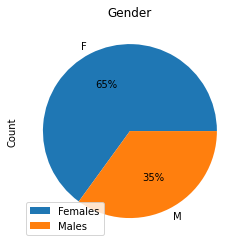

In [15]:
# Pie chart Gender Ratio
labels=['Females','Males']
df.Gender.value_counts().plot.pie(autopct='%1.0f%%').legend(labels, loc=3)
plt.ylabel('Count')
plt.title('Gender');

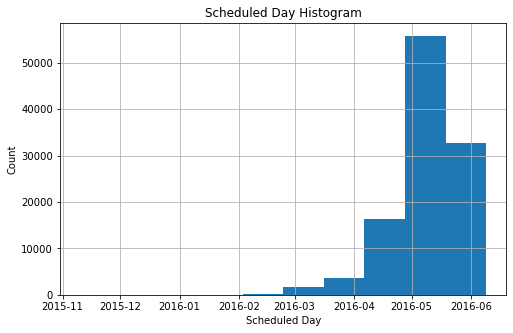

In [16]:
# Histogram of ScheduledDay
df.ScheduledDay.hist(figsize=(8,5))
plt.xlabel('Scheduled Day') 
plt.ylabel('Count') 
plt.title('Scheduled Day Histogram');

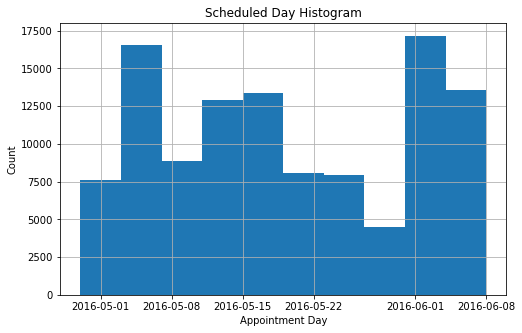

In [17]:
# Histogram of Appointment Day
df.AppointmentDay.hist(figsize=(8,5));
plt.xlabel('Appointment Day') 
plt.ylabel('Count') 
plt.title('Scheduled Day Histogram');

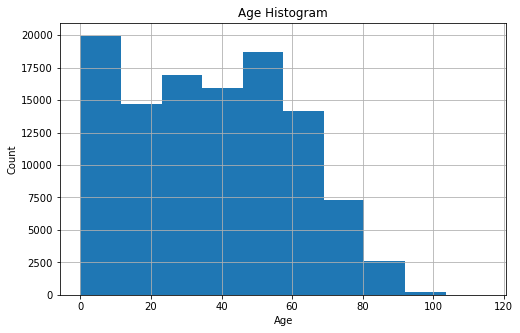

In [18]:
# Age Ranges
df.Age.hist(figsize=(8,5));
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Age Histogram');

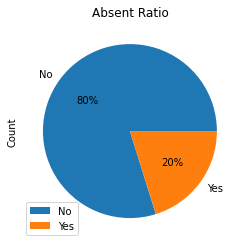

In [19]:
# Pie Chart Absent Ratio
labels=['No','Yes']
df.Absent.value_counts().plot.pie(autopct='%1.0f%%').legend(labels, loc=3)
plt.ylabel('Count')
plt.title('Absent Ratio');

### Research Question 1: Does Age affect no show Appointment?

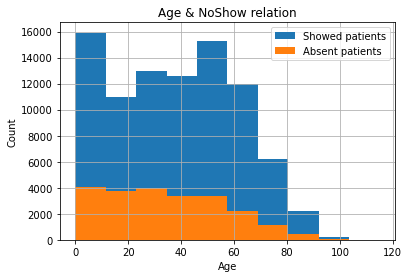

In [20]:
# Histogram of Age & NoShow relation
df.groupby('Absent').get_group('No')['Age'].hist(label='Showed patients');
df.groupby('Absent').get_group('Yes')['Age'].hist(label='Absent patients');
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();
plt.title('Age & NoShow relation');


In [21]:
# Mean Age for showed appointment
df.groupby('Absent').get_group('No')['Age'].mean()

37.790504154999034

In [22]:
# Mean Age for absent appointment
df.groupby('Absent').get_group('Yes')['Age'].mean()

34.31766656212196

### Findings:
- Age does not affect missing the appointment strongly.

- The mean Age for Absent patients is 35 years old while on the other hand, the mean Age for Showed patients is 38 years old.

### Research Question 2 : Does Gender affect no show Appointment?

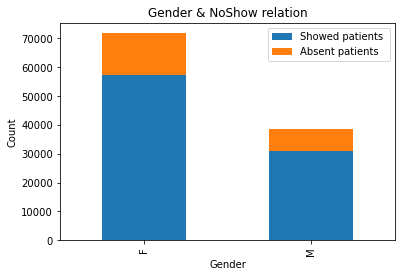

In [23]:
# Bar chart of Gender & NoShow relation
df.groupby('Gender')['Absent'].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(['Showed patients ','Absent patients']);
plt.ylabel('Count');
plt.title('Gender & NoShow relation');

In [24]:
# Total Absent Male & Female patients
Total_Absent = df.groupby('Absent').get_group('Yes')['Gender'].value_counts()
print(Total_Absent)

# Total Female
Total_Female = df.groupby('Gender').get_group('F')['Absent'].count()
print(Total_Female)

# Total Male
Total_Male = df.groupby('Gender').get_group('M')['Absent'].count()
print(Total_Male)

F    14594
M     7725
Name: Gender, dtype: int64
71839
38687


In [25]:
# % of Absent Female
per_absent_F = (Total_Absent[0] / Total_Female)*100
print(per_absent_F)

20.314870752655242


In [26]:
# % of Absent Male
per_absent_M = (Total_Absent[1]/ Total_Male)*100
print(per_absent_M)

19.967947889471915


### Findings:
- Gender does not affect missing the appointment strongly.

- Percentage of Absent genders almost the same (20% are females while 19.9% are males)

### Research Question 3 : Does Receiving an SMS message or not affect no show Appointment?

In [27]:
# Filter data by Absent Status & received SMS
df.groupby('Absent')['SMS_received'].value_counts()

Absent  SMS_received
No      0               62509
        1               25698
Yes     0               12535
        1                9784
Name: SMS_received, dtype: int64

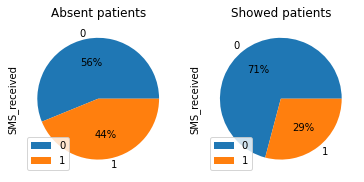

In [57]:
# Pie chart of SMS & NoShow relation (using ploting function)
def plt2pies (f1,t1,f2,t2):
     plt.subplot(1,2,1)
     f1.plot.pie(autopct='%1.0f%%').legend(loc=3)
     plt.title(t1);
     plt.subplot(1,2,2)
     f2.plot.pie(autopct='%1.0f%%').legend(loc=3)
     plt.title(t2);
     return plt.show();
    
# main code
a = df.groupby('Absent').get_group('Yes')['SMS_received'].value_counts()
b = 'Absent patients'
c = df.groupby('Absent').get_group('No')['SMS_received'].value_counts()
d = 'Showed patients'

plt2pies (a,b,c,d)


### Findings:
- Receiving an SMS does not affect missing the appointment strongly, however most of patients did not recive an sms.
-  For patients who recivied an SMS, Absent patients percntage(43%) is higher than showed ones(29%).

<a id='conclusions'></a>
## Conclusions

- Age does not affect no show appointment, as absent age comapred to showed age is 35 to 38 year old.
- Gender does not affect no show appointment, almost same absent percentage among Male & Female.
- Reciving an SMS does not affect no show appointment, but SMS served should be improved as most of absent & showed patients did not recive an SMS.

<a id='Limitations'></a>
## Limitations
- The time duration of collected data is insufficient (only two months) to obtain a clear analysis of patients' attendance behavior.
- Missing reason for not receiving an SMS along with patients' feedback regarding this service should be meaningful for analysis.